Análisis Exploratorio de los datos (Exploratory Data Analysis = EDA)

El reporte debe incluir un resumen de estadísticas descriptivas de los datasets, análisis univariados (por ejemplo, distribución de variables numéricas), análisis bivariados (correlación entre variables numéricas y/o categóricas) y cualquier análisis que le ayude al mejor entendimiento de los datos (encontrar patrones, outliers y/o anomalías, entre otros). El reporte debe presentarse en un notebook (.ipynb) con adecuado uso de markdowns y comentarios.


#### Para el anailis de mercado se ha seleccionado la telefonia movil:
* portabilidad_movil
* Telefonia_movil_ingresos_prestación del cervicio

#### para el analisis de mercado se ha seleccionado el internet:
* Listadodelocalidadesconconectividadainternet.csv
* Internet_Penetracion.csv
* historico_velocidad_internet.csv
* AccesosaInternetfijoportecnologiaylocalidad.csv

In [ ]:
import requests
response = requests.get("http://junardemo.cloudapi.junar.com/api/v2/datasets/PENET-DE-INTER-FIJO-57760.csv/?auth_key=VkMHzpB1kwZAiRDKgjRHqHa1kWGnj9LEVYVWHXAu")

In [ ]:
if response.status_code == 200:
    # Request successful
    data = response.json()
    # Process the retrieved data as needed
else:
    # Request failed
    print("Error:", response.status_code)

In [ ]:
print(data['tags'])

In [ ]:
import requests
response = requests.get("http://junardemo.cloudapi.junar.com/api/v2/visualizations/PENET-DE-INTER-FIJO-57760.json")

In [ ]:
print(response)

# using the csv Files

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv('data//AccesosaInternetfijoportecnologiaylocalidad.csv', delimiter=',')

Se elimina 2 columnas inecesarias

In [10]:
data1.drop('Unnamed: 13', axis=1, inplace=True)
data1.drop('Total general', axis=1, inplace=True)

In [12]:
data1.head(4)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327


En las siguientes 3 celdas se busca mejorar la calidad de los datos cambiar '- 0' de tipo string a 0 entero 'int'

In [13]:
data1 = data1.replace('\.', '', regex=True)

In [14]:
data1 = data1.replace('\- 0', '', regex=True)

In [15]:
data1 = data1.replace('', 0)

In [16]:
data1.head(4)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327


Se cambia el tipo de dato de las columnas de tipos de tecnologia de string a int

In [17]:
data1[['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']] = data1[['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].astype(int)

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provincia     3142 non-null   object
 1   Partido       3142 non-null   object
 2   Localidad     3142 non-null   object
 3   Link Indec    3142 non-null   object
 4   ADSL          3142 non-null   int32 
 5   CABLEMODEM    3142 non-null   int32 
 6   DIAL UP       3142 non-null   int32 
 7   FIBRA OPTICA  3142 non-null   int32 
 8   OTROS         3142 non-null   int32 
 9   SATELITAL     3142 non-null   int32 
 10  WIMAX         3142 non-null   int32 
 11  WIRELESS      3142 non-null   int32 
dtypes: int32(8), object(4)
memory usage: 196.5+ KB


Comprobando si existen provincias con valores distintos

In [19]:
data1['Provincia'].unique() # caba y buenos aires son lo mismo

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

Reemplazando el valor CABA por BUENOS AIRES

In [ ]:
# data1.loc[data1.loc[data1['Provincia'] == 'CABA'].index[0], 'Provincia'] = 'BUENOS AIRES'

Se agrupa los valores de las tecnologias por regiones

In [20]:
XProvincia = data1.groupby('Provincia').sum()
XProvincia

C:\Users\Borrarxxx\AppData\Local\Temp\ipykernel_17712\2493754084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  XProvincia = data1.groupby('Provincia').sum()


,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
Provincia,,,,,,,,
BUENOS AIRES,339648,2748325,6199,1436433,61238,1307,1672,126846
CABA,140791,1240125,2145,129218,29585,57,0,5758
CATAMARCA,10010,10495,1,46224,2152,82,0,1329
CHACO,27164,61800,5,44645,2277,77,0,8178
CHUBUT,45377,72212,904,9574,7796,131,0,29784
CORDOBA,163770,465461,68,338570,9571,100,58,61070
CORRIENTES,36508,77140,4,18619,5174,86,59,7256
ENTRE RIOS,60345,132952,22,36971,12320,27,224,26098
FORMOSA,14470,25880,1,11041,154,57,0,16935


Buscando identificar las teonologias dominantes en cada provincia y observar variaciones en el uso de la tecnologia en las diferente regiones.
* Identify provinces with the highest technology usage
* Compare technology usage across provinces
* Identify provinces with similar technology profiles
* Identify outliers or anomalies

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Create a function to highlight the first 3 highest values and apply a color gradient
def highlight_top3(row):
    top3 = row.nlargest(3)  # Select the top 3 highest values in the row
    mask = pd.Series(False, index=row.index)  # Create a mask to highlight values

    # Set the mask to True for the top 3 highest values
    mask[top3.index] = True

    # Create a list of color values based on the values in the row
    colors = ['background-color: purple' if val == row.max() else f'background-color: rgb(0, 0, {int(val/row.max()*255)})' for val in row]
    
    # Apply the mask to highlight the top 3 highest values
    colors = [color if mask[idx] else '' for idx, color in enumerate(colors)]

    return colors

# Apply the function to highlight the top 3 highest values with a color gradient
styled_df = XProvincia.style.apply(highlight_top3, axis=1)

# Display the styled dataframe
display(styled_df)


,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
Provincia,,,,,,,,
BUENOS AIRES,339648,2748325,6199,1436433,61238,1307,1672,126846
CABA,140791,1240125,2145,129218,29585,57,0,5758
CATAMARCA,10010,10495,1,46224,2152,82,0,1329
CHACO,27164,61800,5,44645,2277,77,0,8178
CHUBUT,45377,72212,904,9574,7796,131,0,29784
CORDOBA,163770,465461,68,338570,9571,100,58,61070
CORRIENTES,36508,77140,4,18619,5174,86,59,7256
ENTRE RIOS,60345,132952,22,36971,12320,27,224,26098
FORMOSA,14470,25880,1,11041,154,57,0,16935


### Creando una tabla comparativa de uso de internet, demografia y %de la  poblacion con acceso

Comprobando si existen valores faltantes:

In [22]:
print("\nMissing values:")
print(data1.isnull().sum())


Missing values:
Provincia       0
Partido         0
Localidad       0
Link Indec      0
ADSL            0
CABLEMODEM      0
DIAL UP         0
FIBRA OPTICA    0
OTROS           0
SATELITAL       0
WIMAX           0
WIRELESS        0
dtype: int64


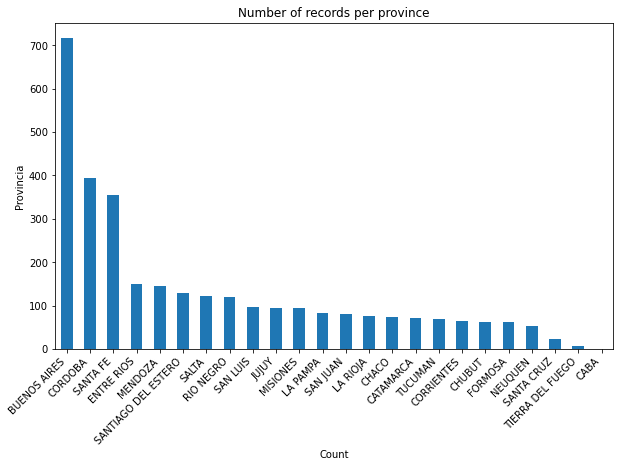

In [23]:
data1['Provincia'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Provincia')
plt.title('Number of records per province')
plt.xticks(rotation=45,ha='right')
plt.show()

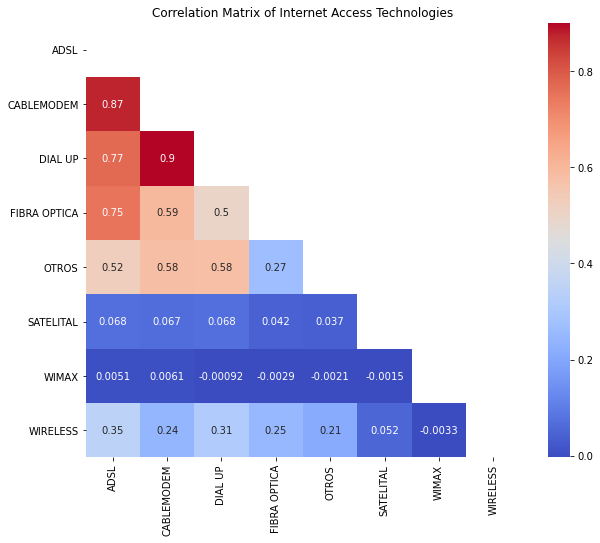

In [25]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert selected columns to numeric types
numeric_columns = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
data1[numeric_columns] = data1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = data1[numeric_columns].corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)
plt.title('Correlation Matrix of Internet Access Technologies')
plt.show()


Strength of correlations and Redundant technologies: 
* ASDL - cable modem
* DIAL UP - cable modem
* ASDL - FIBRA OPTICA

In [ ]:
import matplotlib.pyplot as plt

# Box plot of 'ADSL' access by 'Provincia'
plt.figure(figsize=(10, 6))
box_plot = data1.boxplot(column='ADSL', by='Provincia', flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'})
plt.xlabel('Provincia')
plt.ylabel('ADSL Access')
plt.xticks(rotation=45, ha='right')

# Get the maximum value for coloring
max_value = data1['ADSL'].max()

# Find the index of the largest value
largest_index = data1['ADSL'].idxmax()

# Color the largest value differently
outliers = box_plot['fliers'][largest_index]
outliers.set(marker='o', color='yellow', markerfacecolor='yellow', markeredgecolor='red', markersize=8)

plt.title('Box plot of ADSL access by province')
plt.show()


In [ ]:
# Histogram of 'CABLEMODEM' access
plt.figure(figsize=(10, 6))
data1['CABLEMODEM'].plot.hist(bins=20)
plt.xlabel('CABLEMODEM Access')
plt.ylabel('Frequency')
plt.title('Histogram of CABLEMODEM access')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data1['ADSL'], data1['CABLEMODEM'])
plt.xlabel('ADSL Access')
plt.ylabel('CABLEMODEM Access')
plt.title('Scatter Plot of ADSL vs. CABLEMODEM Access')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data1['ADSL'], data1['CABLEMODEM'], c=data1['Provincia'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('ADSL Access')
plt.ylabel('CABLEMODEM Access')
plt.title('Scatter Plot of ADSL vs. CABLEMODEM Access')
plt.colorbar(label='Provincia')
plt.show()

In [27]:
import pandas as pd
data1.to_csv('output.csv', index=False)